# Devoir de Calcul Différentiel : Courbes de niveau

## Préambule

### Dépendances logicielles

In [2]:
# Python Standard Libraries
import math
from random import random

In [34]:
# Third-Party Libraries

import autograd
import autograd.numpy as np
from autograd.numpy import linalg

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

from IPython.display import display

### Différentiation automatique

In [4]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [5]:
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

In [36]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [51]:
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

In [55]:
def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

In [56]:
def f3(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) 

In [52]:
def f_c(x, y):
    x = np.array(x)
    y = np.array(y)
    return 3.0*x*x - 2.0*x*y + 3.0*y*y - 0.8

In [53]:
def f2_c(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2 - 1.0

In [72]:
def f3_c(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) + 0.8

## Ensemble de niveaux

### Analyse des ensembles de niveaux

#### Question 1

Soit $c \in \mathbb{R}$, l'ensemble $\{c\}$ est un fermé. La fonction $f$ étant continue, la courbe de niveau $c$, qui est en fait $f^-1(\{c\})$ est également un fermé.

#### Question 2

On remarque que le vecteur $T = \frac {1} {\|\nabla f(x_0)\|} \begin{pmatrix} \partial_2 f(x_0) \\ -\partial_1 f(x_0) \end{pmatrix}$ est le vecteur normalisé orthogonal au gradient donc tangent à la courbe au point $x_0$. Ainsi, $p(x_1,x_2)$ correspond au produit scalaire entre $T$ et le vecteur $MM_0 = \begin{pmatrix} x_1 - x_{10} \\ x_2 - x_{20} \end{pmatrix}$, ce qui géométriquement correspond à la projection orthogonale de $MM_0$ sur  $T$.

#### Question 3

On pose $ \phi : \mathbb{R}^2 \times \mathbb{R} \to \mathbb{R}^2$ telle que $ \forall (x,t) \in \mathbb{R}^2 \times \mathbb{R},  \phi(x,t) = \begin{pmatrix} f(x) - c \\ t - p(x) \end{pmatrix}$. $f$ est continûment différentiable par hypothèse, et $\phi$ l'est car polynomiale en les coefficents de $x$.   
     
Vérifions les hypothèses du théorème des fonctions implicites :  
- $\phi(x_0,p(x_0)) = 0$ 
- Soit $\partial_x \phi(x_0,p(x_0))= \begin{pmatrix} \partial_1 f(x_0)& \partial_2 f(x_0) \\ -\frac {\partial_2 f(x_0)} {\|\nabla f(x_0)\|} & \frac {\partial_1 f(x_0)} {\|\nabla f(x_0)\|} \end{pmatrix}$.    
       
On remarque alors que $det(\partial_x \phi(x_0,p(x_0))) = \|\nabla f(x_0)\| \ne 0$, donc $\partial_x \phi(x_0,p(x_0))$ est bien inversible.    
    
Le théorème dans sa version étendue s'applique, donc il existe un voisinage ouvert de $p(x_{10},x_{20})=0$, c'est-à-dire un intervalle $]-\varepsilon,\varepsilon[$, avec $\varepsilon > 0$ et un voisinage ouvert $U$ de $x_0$ et $\gamma : \mathbb{R} \to \mathbb{R}^2$ continûment différentiable telle que $\forall t \in ]-\varepsilon,\varepsilon[ $ et $ \forall x \in U \ \phi(x,t) = 0 \Leftrightarrow (x_1,x_2) = \gamma(t)$, et comme lorsque $\phi(x,t)=0, \ t=p(x)$, on obtient bien le résultat demandé.

#### Question 4

Soit $t \in ]-\varepsilon,\varepsilon[$,

- Montrons que $\gamma'(t)$ est non nul :      
Le théorème des fonctions implicites, que l'on a utilisé à la question précédente pour obtenir la fonction $\gamma$, nous donne :      
$ \forall t \in ]-\varepsilon,\varepsilon[, \ \gamma'(t) = [\partial_x \phi(y,t)]^{-1} \cdot \partial_t \phi(y,t) $, avec $y = p(x_1,x_2)$.        
Or, $\forall (x,t) \in \mathbb{R}^2 \times \mathbb{R} , \ \partial_t \phi(x,t) = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$, ce qui signifie que $\gamma'(t)$ est la deuxième colonne de $[\partial_x \phi(y,t)]^{-1}$, qui est effectivement non nul car sinon le déterminant de $[\partial_x \phi(y,t)]^{-1}$ serait nul.

             
- Montrons que $\gamma'(t)$ est orthogonal à $\nabla f(\gamma(t))$, c'est-à-dire que $<\nabla f(\gamma(t)),\gamma(t)> \, = 0$ :      
Par définition, $\forall t \in ]-\varepsilon,\varepsilon[, \ f \circ \gamma(t) \, = c$, donc en différenciant, on obtient : 
$ \nabla f(\gamma(t))^{T} \cdot \gamma'(t) \, = 0 $, ce qui est bien le résultat voulu.

### Construction des courbes de niveau

#### Question 5 

In [6]:
N = 100
eps = 1e-8

L'algorithme de Newton est peu sensible aux erreurs d'arrondi car il converge rapidement pour autant qu'on soit relativement proche de la racine cherchée. Par conséquent, il n'y a pas besoin de choisir une valeur de `eps` trop petite. Comme dans l'exemple du cours sur les différences finies, on peut prendre `eps = 1e-8` pour éviter à la fois les erreurs de troncature et d'arrondi.

#### Tâche 1

In [7]:
def Newton(F, x0, y0, eps = eps, N = N) :
    
    for i in range(N) :
        
        J_F = J(F)(x0, y0)
        X0 = np.array([x0, y0])
        M = linalg.inv(J_F)
        
        X = X0 - M.dot(F(x0, y0))
        x, y = X[0], X[1]        
        
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return x, y
        
        x0, y0 = x, y
    
    raise ValueError(f"no convergence in {N} steps.")

#### Tâche 2

Le point de la courbe de niveau c = 0.8, respectant la condition x1 = x2, et obtenu à partir des conditions
initiales x10 = x20 = 0.8, est le point de coordonnées (0.447, 0.447)


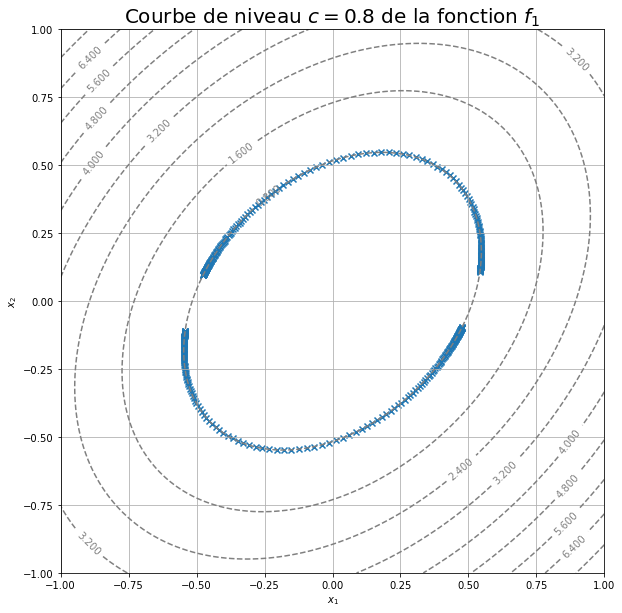

In [58]:
# On recode Newton en ajoutant la possibilité de mettre une contrainte entre x1 et x2

def Newton_2(F, x0, y0, eps = eps, N = N, k = 1) :
        
    def F_2(F, k) :
            
        def F2(x, y):
            return np.array([F(x,y), x - k*y])
            
        return F2
        
    F_2 = F_2(F, k)
        
    return Newton(F_2, x0, y0, eps, N)

x, y = Newton_2(f_c, 0.8, 0.8)
print(f"""Le point de la courbe de niveau c = 0.8, respectant la condition x1 = x2, et obtenu à partir des conditions
initiales x10 = x20 = 0.8, est le point de coordonnées ({x:.3f}, {y:.3f})""")

X = []
Y = []

for q in np.linspace(-5.0, 5.0, 200):
    x, y = Newton_2(f, 0.8, 0.8, k = q)
    x_, y_ = Newton_2(f, -0.8, -0.8, k = q)
    X.append(x) ; X.append(x_)
    Y.append(y) , Y.append(y_)


display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.title('Courbe de niveau $c = 0.8$ de la fonction $f_1$', fontsize = 20)
plt.scatter(X, Y, marker = 'x')
plt.show()

### Génération des points

#### Question 6 et Tâche 3

Pour cette question 6, on va chercher les 0 consécutifs de fonctions définies à l'aide des points successifs $(x_0, y_0),\:  \cdots,\: (x_{N-1}, y_{N-1}) $ comme $F_{x_i, y_i} : (x,y) \in \mathbb{R}^2 \mapsto \begin{pmatrix}(x-x_i)^2 \: +\: (y-y_i)^2\:-\:  \delta ^2\\ f(x,y)\: -\: c\end{pmatrix}$ 

  Pour que l'on s'oriente "à droite" quand on est en $(x_i, y_i)$ en regardant dans la direction du gradient de f en ce point, on doit prendre pour point de départ dans la recherche de Newton un point "à droite" de celui qu'on a déjà. Pour cela, on prend le point $(x_{depart}, y_{depart})$ tel que $\begin{pmatrix}x_{depart}\\ y_{depart}\end{pmatrix}\: =\: \begin{pmatrix}x_i\\ y_i\end{pmatrix}\: +\: \frac{\delta }{\left \|\triangledown f(x_i, y_i) \right \|}\begin{pmatrix}\partial_yf(x_i, y_i)\\ -\partial_xf(x_i, y_i)\end{pmatrix}$ où on a effectué une rotation d'angle $-\frac{\pi }{2}$.

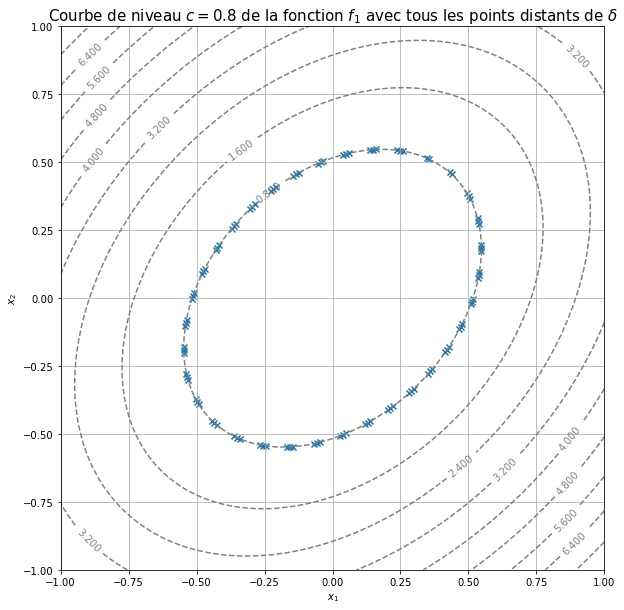

In [104]:
def F_centre(F, x0, y0, delta):
    def F_cercle(x, y):
        return np.array([F(x, y), (x-x0)**2 + (y-y0)**2 - delta**2])
    return F_cercle

def rotation_grad(F, x0, y0):
    grad_F = grad(F)
    grad_rot = np.array([grad_F(x0, y0)[1], -grad_F(x0, y0)[0]])
    return grad_rot/linalg.norm(grad_rot)

def level_curve(F, x0, y0, delta = 0.1, N = 100, eps = eps):
    x = []
    y = []
    for i in range(N):
        F_cercle = F_centre(F, x0, y0, delta)
        xdep, ydep = x0 + delta*rotation_grad(F, x0, y0)[0], y0 + delta*rotation_grad(F, x0, y0)[1]
        x_, y_ = Newton(F_cercle, xdep, ydep)
        x.append(x_)
        y.append(y_)
        x0, y0 = x_, y_
    return np.array([x, y])

M = level_curve(f_c, 0.447, 0.447)
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.title('Courbe de niveau $c = 0.8$ de la fonction $f_1$ avec tous les points distants de $\delta$', fontsize = 15)
plt.scatter(M[0], M[1], marker = 'x')
plt.show()

Text(0.5, 1.0, 'Courbe de niveau $c = 1.0$ de la fonction $f_2$ avec tous les points distants de $\\delta$')

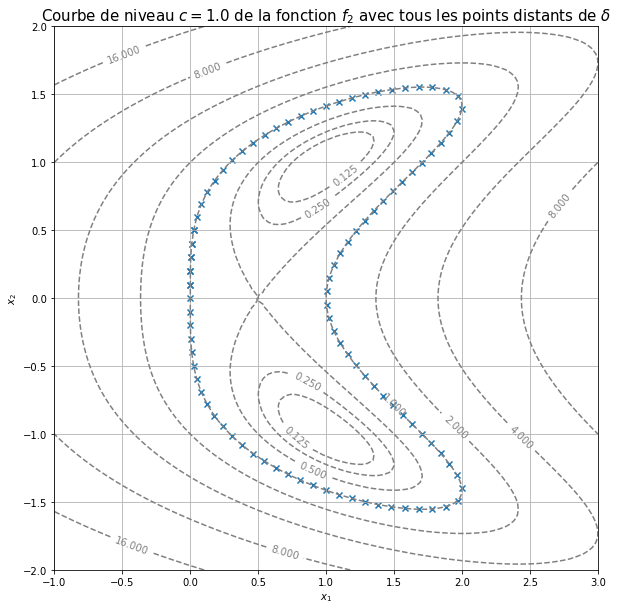

In [105]:
M = level_curve(f2_c, 0.0, 0.0)
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)
plt.scatter(M[0], M[1], marker = 'x')
plt.title('Courbe de niveau $c = 1.0$ de la fonction $f_2$ avec tous les points distants de $\delta$', fontsize = 15)

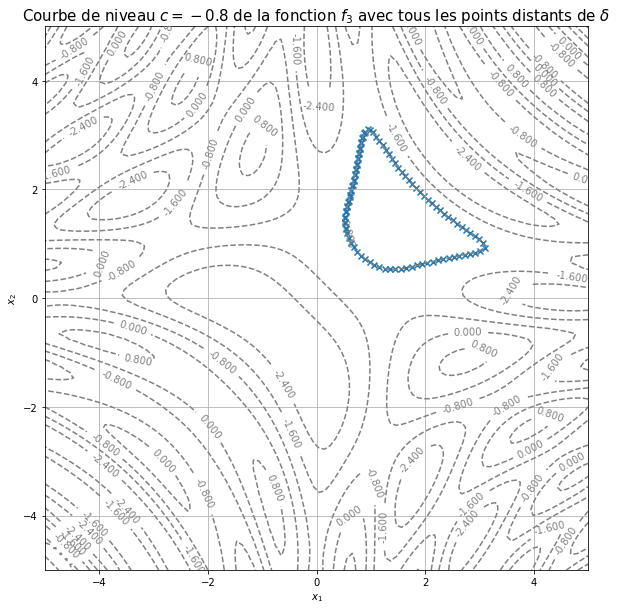

In [106]:
M = level_curve(f3_c, 1.0, 3.0)
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)
plt.title('Courbe de niveau $c = -0.8$ de la fonction $f_3$ avec tous les points distants de $\delta$', fontsize = 15)
plt.scatter(M[0], M[1], marker = 'x')
plt.show()

### Bouclage et auto-intersection

#### Question 7 et Tâche 4

Dans la fonction $f_3$, on remarque un point d'auto-intersection de coordonnées `(0.5, 0.0)`. De plus, on voit que la fonction partielle $ x_1 \mapsto f_3(x_1, \, 0)$ admet un maximum en `(0.5, 0.0)`, et la deuxième fonction partielle $x_2 \mapsto f_3(0.5, \, x_2)$ admet un minimum en `(0.5, 0.0)`. Ce point est donc un point selle. Cette situation étant relativement rare, on peut se permettre de vérifier seulement l'appartenance des nouveaux points construits au premier segment.     
Le premier point de la courbe de niveau est $M_0 \, = \, (x_0, \, y_0)$, le deuxième est $M_1 \, = \, (x_1, \, y_1)$.

   Pour voir si le dernier segment tracé intersecte le premier segment tracé, il suffit de regarder les résultats de quelques opérations: on note $M_iM_{i+1}$ le dernier segment tracé.
   
   Les segments $M_0M_1$ et $M_iM_{i+1}$ s'intersectent si: $\left\{\begin{matrix}M_0M_1 \wedge M_iM_{i+1} \neq 0\\ \left \langle (M_0M_1 \wedge M_0M_{i+1}),\: (M_0M_1 \wedge M_0M_i) \right \rangle \leq 0\\ \left \langle (M_iM_{i+1} \wedge M_iM_1),\: (M_iM_{i+1} \wedge M_iM_0) \right \rangle \leq 0\end{matrix}\right.$. Où on a transformé les vecteurs de $\mathbb{R}^2$ en vecteurs de $\mathbb{R}^3$. On suppose en outre que les 4 points ne sont pas parfaitement alignés, ce qui semble raisonnable.

In [107]:
def level_curve_bis(F, x0, y0, delta = 0.1, N = 1000, eps = eps):
    M0 = np.array([x0, y0, 0])
    F_cercle = F_centre(F, x0, y0, delta)
    xdep, ydep = x0 + delta*rotation_grad(F, x0, y0)[0], y0 + delta*rotation_grad(F, x0, y0)[1]
    x1, y1 = Newton(F_cercle, xdep, ydep)
    M1 = np.array([x1, y1, 0])
    first_segm = M1-M0
    x = [x0, x1]
    y = [y0, y1]
    for i in range(1, N):
        F_cercle = F_centre(F, x1, y1, delta)
        xdep, ydep = x1 + delta*rotation_grad(F, x1, y1)[0], y1 + delta*rotation_grad(F, x1, y1)[1]
        x_, y_ = Newton(F_cercle, xdep, ydep)
        if i >= 2:
            M_i = np.array([x[i-1], y[i-1], 0])
            M = np.array([x_, y_, 0])
            new_segm = M-M_i
            if linalg.norm(np.cross(first_segm, new_segm)) != 0 and np.vdot(np.cross(first_segm, M-M0), np.cross(first_segm, M_i-M0)) <= 0 and np.vdot(np.cross(new_segm, M1-M_i), np.cross(new_segm, M0-M_i)):
                return np.array([x, y])
        x.append(x_)
        y.append(y_)
        x1, y1 = x_, y_
    return np.array([x, y])

#### Tâche 5

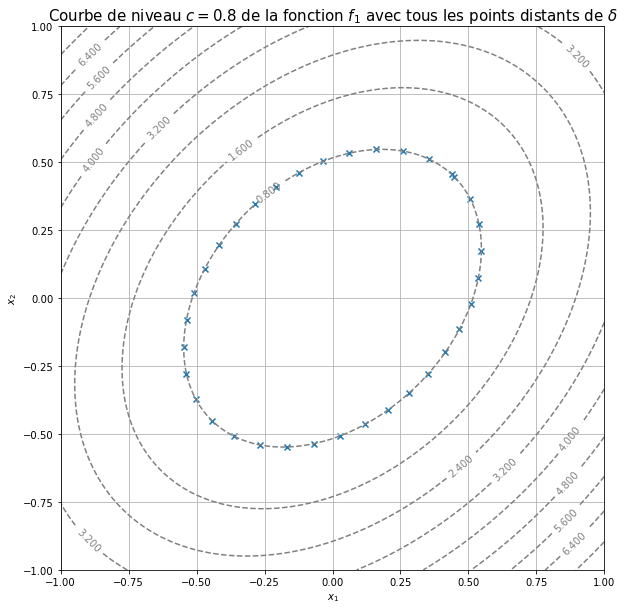

In [108]:
M = level_curve_bis(f, 0.447, 0.447)
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.title('Courbe de niveau $c = 0.8$ de la fonction $f_1$ avec tous les points distants de $\delta$', fontsize = 15)
plt.scatter(M[0], M[1], marker = 'x')
plt.show()

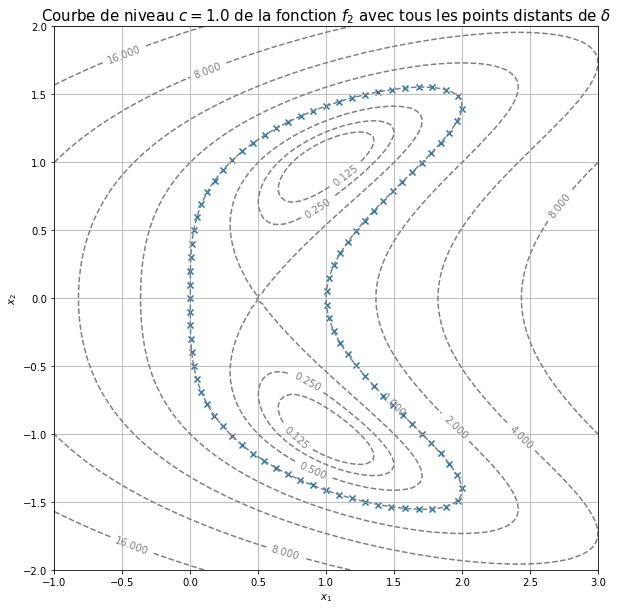

In [109]:
M = level_curve_bis(f2_c, 0.0, 0.0)
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)
plt.title('Courbe de niveau $c = 1.0$ de la fonction $f_2$ avec tous les points distants de $\delta$', fontsize = 15)
plt.scatter(M[0], M[1], marker = 'x')
plt.show()

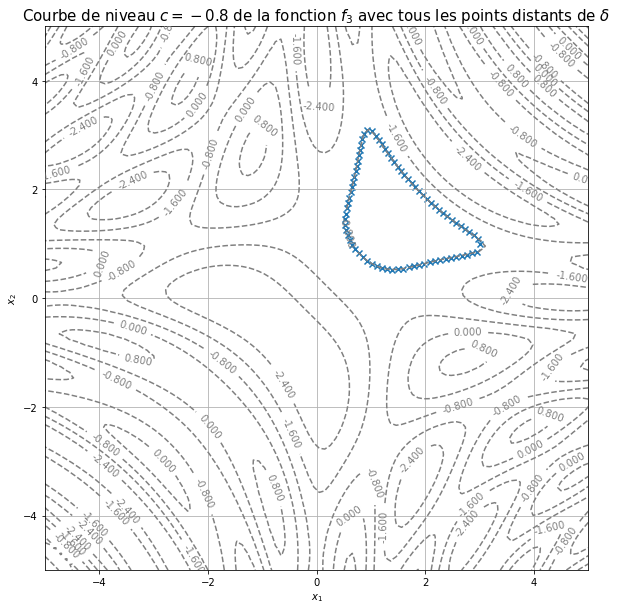

In [110]:
M = level_curve_bis(f3_c, 3.0, 1.0, N = 1000)
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)
plt.title('Courbe de niveau $c = -0.8$ de la fonction $f_3$ avec tous les points distants de $\delta$', fontsize = 15)
plt.scatter(M[0], M[1], marker = 'x')
plt.show()

## Post-traitement

### Interpolation

#### Question 8

On veut une fonction $\gamma : [0,1] \rightarrow \mathbb{R}^2$ continûment différentiable et telle que, en prenant des points $P_1 \: et \: P_2$ et des vecteurs non nuls $u_1 \: et \: u_2 \: de \: \mathbb{R}^2$, on a $\left\{\begin{matrix}\gamma (0) = P_1\\ \gamma (1) = P_2\end{matrix}\right.$, $\gamma '(0)$ positivement colinéaire à $u_1$ et $\gamma '(1)$ positivement colinéaire à $u_2$.

   En cherchant $\gamma (t)$ sous la forme $\gamma (t) = \begin{pmatrix}a + bt + ct^2\\ d + et + ft^2\end{pmatrix}$, on a $\gamma '(t) = \begin{pmatrix}b + 2ct\\ e + 2ft\end{pmatrix}$
   
   On a donc les conditions suivantes: $\left\{\begin{matrix}\begin{pmatrix}a\\ d\end{pmatrix} = \overrightarrow{OP_1}\\ \begin{pmatrix}a+b+c\\ d + e +f\end{pmatrix} = \overrightarrow{OP_2}\\\begin{pmatrix}b\\ e\end{pmatrix} = \alpha u_1 \\ \begin{pmatrix}b + 2c\\ e + 2f\end{pmatrix} = \beta u_2\end{matrix}\right.$, où $(\alpha, \beta) \: \in \: (\mathbb{R}^{+*})^2$.
   
   Au moins une solution existe s'il existe $(\alpha, \beta) \: \in \: (\mathbb{R}^{+*})^2$ tels que $\overrightarrow{P_1P_2} = \frac{1}{2}(\beta u_2 + \alpha u_1)$.      
   
   Calculer $\alpha$ et $\beta$, quand c'est possible, revient à résoudre un système de deux équations à deux inconnus. Pour cela, on utilise la fonction `solve` de l'extension linalg de la bibliothèque NumPy.     
   On note $P_i = \begin{pmatrix} x_i \\ y_i \end{pmatrix}$ et $u_i = \begin{pmatrix} u_{i1} \\ u_{i2} \end{pmatrix}$. Avec ces notations, on obtient directement les égalités $a = x_1, \, d = y_1, \, b = \alpha u_{11}$ et $e = \alpha u_{12}$. On se ramène donc à un nouveau "système de deux équations à deux inconnus" : $\begin{cases} c & = & x_2 - x_1 - \alpha u_{11} \\
                                                                                    f & = & y_2 - y_1 - \alpha u_{12} \end{cases}$, qui est en fait déjà résolu.     
              
Dans le cas où il est impossible de résoudre le système, on extrapole linéairement le chemin entre $P_1$ et $P_2$, c'est-à-dire, $\forall t \in [0,1], \, \gamma(t) = (1-t)P_1 + tP_2$.

#### Tâche 6

(2, 100)


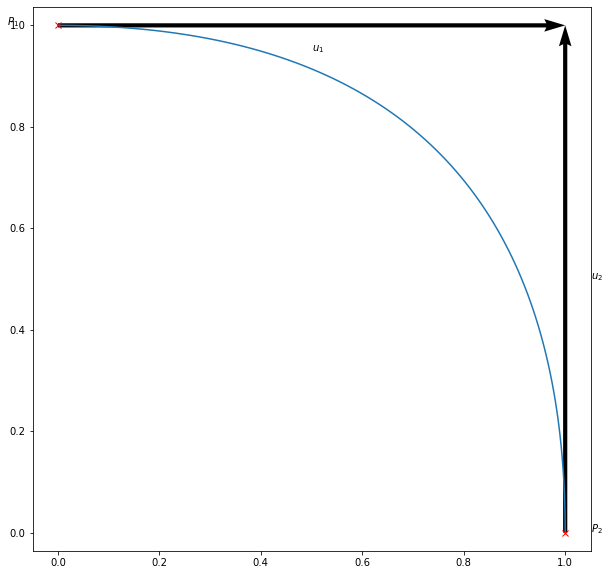

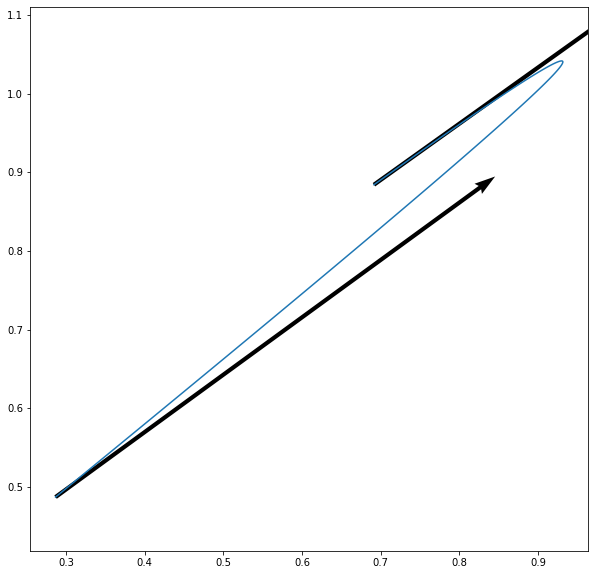

In [29]:
def gamma(t, P1, P2, u1, u2):
    
    x1, y1 = P1
    x2, y2 = P2
    u11, u12 = u1
    u21, u22 = u2
    
    A = np.array([[u11, u21], [u21, u22]])
    b = 2 * np.array([x2 - x1, y2 - y1])
    
    try:
        alpha, beta = linalg.solve(A, b)
        a, d, b, e = x1, y1, alpha*u11, alpha*u12
        c = x2 - a - b
        f = y2 - d - e
        
        return np.array([a + b*t + c*t*t,
                        d + e*t + f*t*t])
    
    except LinAlgError:
        return np.array([(1 - t)*x1 + t*x2],
                       [(1 - t)*y1 + t*y2])


P1 = np.array([1, 0])
P2 = np.array([0, 1])

u1 = np.array([0, 1])
u2 = np.array([1, 0])

T = np.linspace(0, 1, 100)
X, Y = gamma(T, P1, P2, u1, u2)

M = gamma(T, P1, P2, u1, u2)
print(M.shape)


plt.quiver([P1[0], P2[0]], [P1[1], P2[1]], [u1[0], u2[0]], (u1[1], u2[1]), scale = 1, scale_units = 'xy')
plt.plot(X, Y)
plt.plot(1, 0, 'rx')
plt.plot(0, 1, 'rx')

plt.text(1.05, 0, '$P_2$')
plt.text(-0.1, 1, '$P_1$')
plt.text(0.5, 0.95, '$u_1$')
plt.text(1.05, 0.5, '$u_2$')

plt.axis('equal')
plt.show()

#Un peu moins régulier

P1 = np.array([random(), random()])
P2 = np.array([random(), random()])
u1 = np.array([random(), random()])
u2 = np.array([random(), random()])

X, Y = gamma(T, P1, P2, u1, u2)

plt.axis('equal')

plt.quiver([P1[0], P2[0]], [P1[1], P2[1]], [u1[0], u2[0]], (u1[1], u2[1]), scale = 1, scale_units = 'xy')
plt.plot(X, Y)
plt.show()

### Intégration

#### Tâche 7

On voit immédiatement qu'on va utiliser la fonction `gamma` à l'intérieur de `level_curve`. Le seul détail à régler est la valeur que l'on prend pour $u_1$ et $u_2$. Par soucis de continuité de la courbe, entre les points $M_i$ et $M_{i+1}$, on prend $u_1$ (respectivement $u_2$) égal à la tangente à la courbe en $M_i$ (respectivement $M_{i+1}$, c'est-à-dire $u_1 = \begin{pmatrix} \partial_y f(x_i,y_i) \\
                -\partial_x f(x_i,y_i) \end{pmatrix}$ (respectivement 
                $u_2 = \begin{pmatrix} \partial_y f(x_{i+1},y_{i+1}) \\
                -\partial_x f(x_{i+1},y_{i+1}) \end{pmatrix}$).

In [31]:
def level_curve_ter(F, x0, y0, delta = 0.1, N = 100, eps = eps, oversampling = 1):
    
    curve = level_curve(F, x0, y0, delta, N, eps)
    grad_F = grad(F)
    n = curve.shape[1]
    
    if oversampling > 1:
        T = np.linspace(0, 1, oversampling + 1)
        
        for i in range(n):
                
            x, y = curve[:, i]
            if i < n-1:
                x_, y_ = curve[:, i+1]
            elif i == n-1:
                x_, y_ = curve[:, 0]
                    
            P1 = x, y
            P2 = x_, y_
                
            u1 = np.array([grad_F(x, y)[1], -grad_F(x, y)[0]])
            u2 = np.array([grad_F(x_, y_)[1], -grad_F(x_, y_)[0]])
            
            extrapolation = gamma(T, P1, P2, u1, u2)
            np.append(curve, extrapolation)
    
    return curve

#### Tâche 8

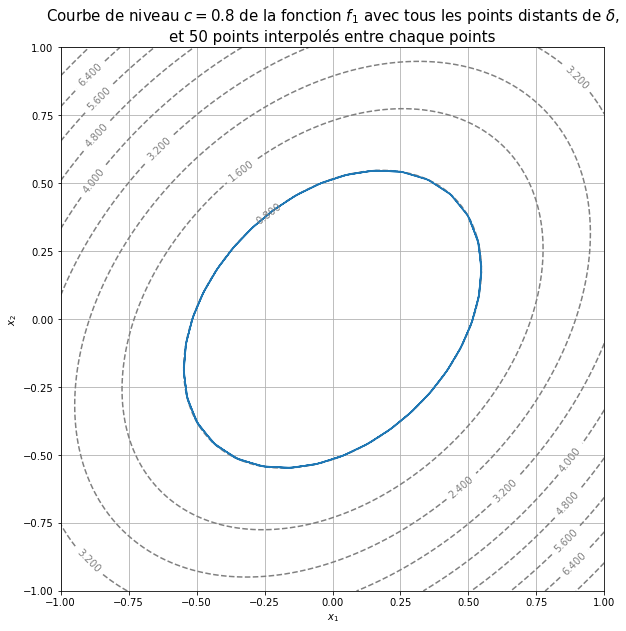

In [113]:
M = level_curve_ter(f_c, 0.447, 0.447, oversampling = 51)
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)
plt.title("""Courbe de niveau $c = 0.8$ de la fonction $f_1$ avec tous les points distants de $\delta$,
et 50 points interpolés entre chaque points""", fontsize = 15)
plt.plot(M[0], M[1])
plt.show()

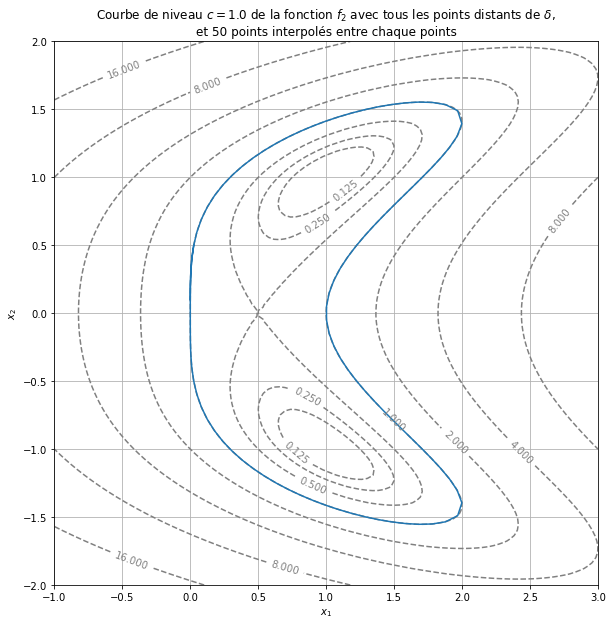

In [114]:
M = level_curve_ter(f2_c, 0.0, 0.0, oversampling = 51)
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)
plt.title("""Courbe de niveau $c = 1.0$ de la fonction $f_2$ avec tous les points distants de $\delta$,
et 50 points interpolés entre chaque points""")
plt.plot(M[0], M[1])
plt.show()

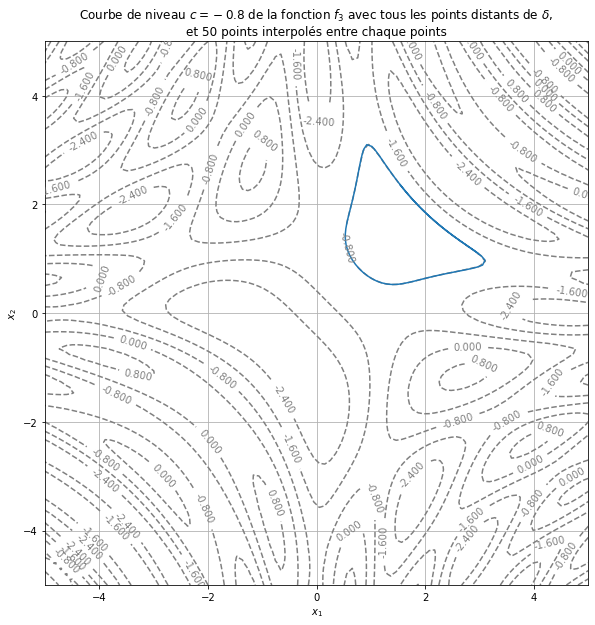

In [115]:
M = level_curve_ter(f3_c, 3.0, 1.0)
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)
plt.title("""Courbe de niveau $c = -0.8$ de la fonction $f_3$ avec tous les points distants de $\delta$,
et 50 points interpolés entre chaque points""")
plt.plot(M[0], M[1])
plt.show()